# The problem time series

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf, adfuller

## Pilares de time series
- **tendência** - é uma evolução temporal (direção que os nossos dados estão evoluindo);
- **sazonalidade** - é as osilações presentes nos nosso dados;
- **resíduos** - o que sobra do sinal.


In [2]:
url = "https://raw.githubusercontent.com/carlosfab/datasets/master/electricity_consumption/Electric_Production.csv"

In [3]:
df = pd.read_csv(url)

df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


Todo dataframe tem uma coluna de index, que representa seus dados, como vamos trabalhar com series temporais, nosso index precisa sempre ser o nosso campo de data, e é muito importante que o campo esteja sempre no formato certo.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    397 non-null    object 
 1   Value   397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


Como podemos ver, no nosso dataframe, o campo de data, tem o tipo texto, a primeira coisa que devemos fazer é transforma-lo para DateTime.

In [5]:
df.index = pd.to_datetime(df['DATE'], format='%m-%d-%Y')

Como transformamos nossa coluna data como index, é importante retirar a coluna index criada automaticamente no nosso df.

In [6]:
df.drop("DATE", inplace=True, axis=1)

In [7]:
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


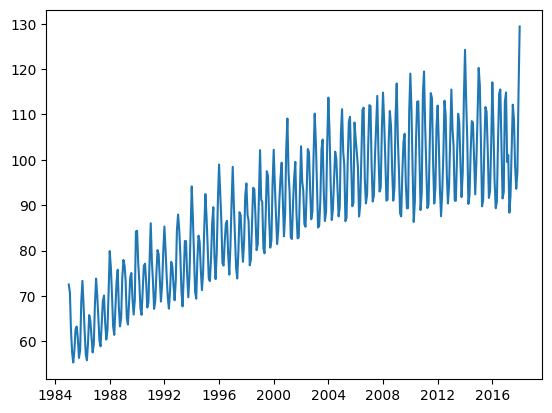

In [8]:
plt.plot(df.index, df.values)

Aqui conseguimos fazer uma breve análise do que esta acontecendo na nossa base, mas agora vamos decompor nossa base, seguindo os princípios da time series.

In [9]:
results = seasonal_decompose(df)

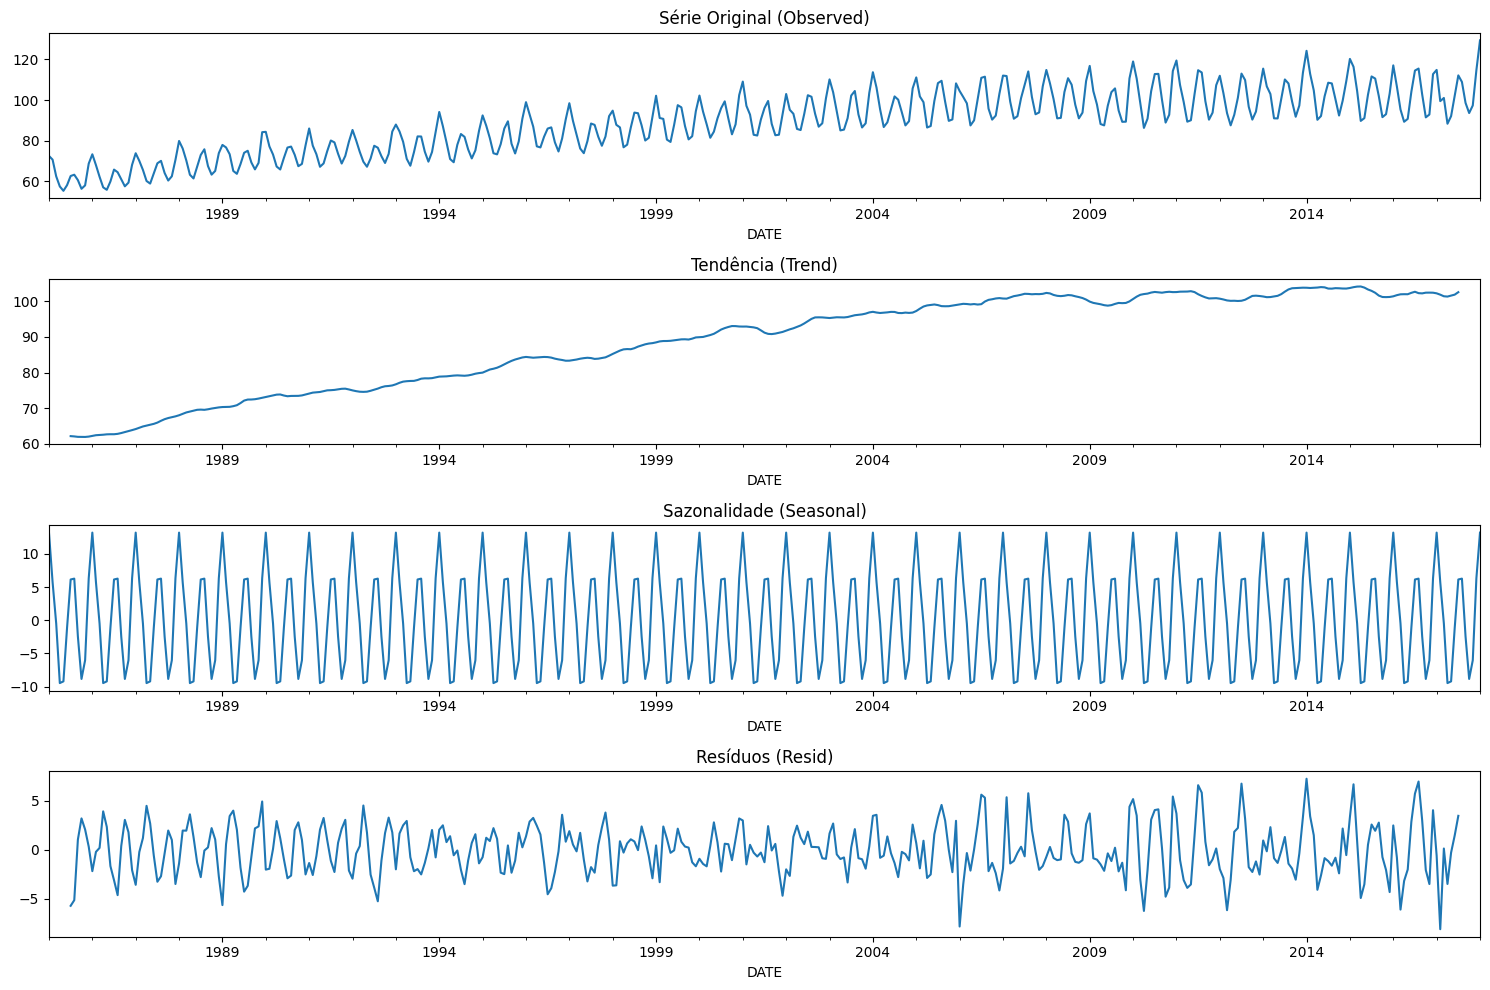

In [10]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize = (15,10))

results.observed.plot(ax=ax1)
ax1.set_title('Série Original (Observed)')
results.trend.plot(ax=ax2)
ax2.set_title('Tendência (Trend)')
results.seasonal.plot(ax=ax3)
ax3.set_title('Sazonalidade (Seasonal)')
results.resid.plot( ax=ax4)
ax4.set_title('Resíduos (Resid)')

plt.tight_layout()

Podemos classificaar as Times Series de duas maneiras:
- Times Series estacionária;
- Times Series não estacionária.

As estacionária podemos dizer que são as que possue uma evolução temporal constante.

Agora iremos criar um resumo estatístico para analisarmos a classificação da nossa base.

## Teste ADF (Augmented Dickey-Fuller)

O teste ADF verifica se existe raiz unitária na série temporal. A presença de raiz unitária indica que a série não é estacionária.

Hipóteses do teste:
- H₀ (nula): A série tem raiz unitária (ou seja, não é estacionária).

- H₁ (alternativa): A série é estacionária.

In [11]:
sns.set_style('darkgrid')

In [12]:
X = df.Value.values

In [13]:
result = adfuller(X)

In [14]:
print("TESTE ADF")
print(f"Teste Estatístico: {result[0]}")
print(f"P-Value: {result[1]}")
print("Valores críticos: ")

for key, value in result[4].items():
    print(f"\t{key}: {value}")

TESTE ADF
Teste Estatístico: -2.2569903500472277
P-Value: 0.1862146911658734
Valores críticos: 
	1%: -3.4476305904172904
	5%: -2.869155980820355
	10%: -2.570827146203181


Como nosso valor estatístico é maior que os valores críticos e nosso p valor é maior que 0.05, conseguimos concluir que a nossa base não é estacionaria.

## Tipos de bibliotecas que utilizamos para análise de times series

### PROPHET

Prophet é usado para modelar e prever dados com tendência sazonal e eventos especiais, como feriados. Ele se baseia em um **modelo aditivo**:

\[
y(t) = g(t) + s(t) + h(t) + \varepsilon_t
\]

Onde:

- **g(t)**: tendência (crescimento linear ou logístico)  
- **s(t)**: sazonalidade (diária, semanal, anual, etc.)  
- **h(t)**: efeitos de feriados/eventos  
- **εₜ**: erro ou ruído aleatório (resíduo)
